<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c1/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción.

La regresión softmax es una generalización de la regresión logística que permite hacer **clasificaciones sobre más de dos categorías**. 

Recordemos que este tipo de regresión se basa en la **función softmax**, la cual sirve para obtener la probabilidad de que dicha observación pertenezca a la clase *c*:

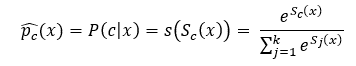

A la hora de entrenar el algoritmo, lo que se hace es ajustar la regresión *Sc(x)*, de forma que al aplicar la función softmax a la misma, obtengamos el menor número de errores posibles en la clasificación.

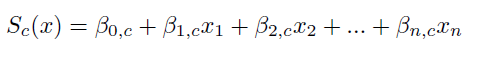

Para el desarrollo de este notebook vamos a seguir trabajando con el mismo conjunto de datos empleado para la Regresión Logística, con el objetivo de apreciar en mayor detalle este concepto de generalización a más de dos clases.

Recordad que el conjunto de datos iris está compuesto de tres clases (Setosa, Versicolor y Virginica), pero para el caso de la Regresión Logística tuvimos que adaptarlo a un problema binario. Esta restricción desaparece al emplear la Regresión Softmax.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


Recordamos que en el formato original, el iris dataset es un diccionario que permite acceder a diferente información del mismo a través de sus claves.

In [2]:
# Importamos el data set iris
from sklearn import datasets
iris = datasets.load_iris()
#iris es un diccionario, veamos sus claves
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

#Representación de la frontera de decisión

Vamos a hacer ahora una regresión softmax, pero quedándonos solo con *dos atributos* con el único propósito de facilitar la visualización de la frontera de decisión.

In [3]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [4]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Hagamos ahora un gráfico sobre cómo queda la frontera de clasificación. 

*NOTA:* El objetivo de esta visualización es que el alumno sea capaz de distinguir la comprender la influencia de la frontera de decisión y no es necesario que se detenga en el código que lo genera. Es por ello, que intencionadamente se ha ocultado el código con el que se obtiene.

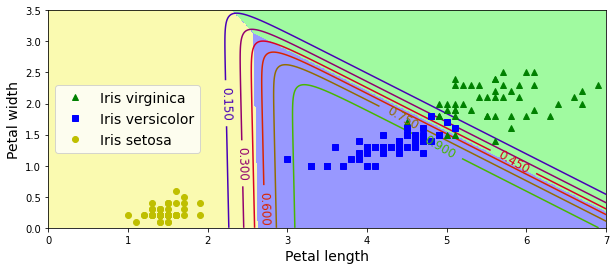

In [5]:
#@title

#Inicialmente generamos unos datos sintéticos que nos servirán para representar las delimitaciones de cada conjunto
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1), # -1 -> El valor es inferido de la longitud del array y el resto de dimensiones. En este casi lo convertimos a vector columna
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

#x0 -> matriz en la que cada fila contiene 500 valores igualmente distribuidos entre 0 y 8
#x1 -> matriz en la que cada columna contiene 200 valores igualmente distribuidos entre 0 y 3.5

#Creamos el np.array con las observaciones sinteticas que servirán para obtener las predicciones
X_new = np.c_[x0.ravel(), x1.ravel()] #.ravel() -> Devuelve un array aplanado contiguo

#Obtenemos las predicciones para los datos generados sintéticamente
y_proba = softmax_reg.predict_proba(X_new) #probabilidades
y_predict = softmax_reg.predict(X_new)     #predicción

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


En la gráfica anterior podemos observar la frontera de deción entre las tres clases para las variables *petal_width* y *petal_length*. El principal motivo por el que se ha decidido realizar la regresión con solo dos variables independientes ha sido el de poder representar la frontera de decisión en un gráfico de 2 dimensiones. 

Una vez hecho esto, y para continuar con el análisis de manera completa, vamos a volver a emplear las cuatro variables explicativas.





# Classificación con regresión softmax

En `scikit-learn` la **regresión softmax** se implementa usando la misma clase que la regresión logística, `LogisticRegression()`, pero hay que tener en cuenta los siguientes ajustes:

*   Es necesario fijar el parámetro `multi_class=‘multinomial’`, para indicar a la función que se trata de un problema de más de dos clases. 
*   Hay que seleccionar un solver de optimización compatible con softmax. Opciones: *‘newton-cg’, ‘sag’, ‘saga’ y ‘lbfgs’*  


In [6]:
X = iris["data"][:,:]
y = iris["target"]

In [7]:
np.unique(y, return_counts=True) # Tenemos 50 observaciones de cada clase -> dataset balanceado

(array([0, 1, 2]), array([50, 50, 50]))

In [8]:
# Dividimos el conjunto en 75% train y 25% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
# Estandarizamos las variables de X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Ajustamos el conjunto de entrenamiento
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='multinomial')
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [16]:
# Predicción de los datos test
y_pred = classifier.predict(X_test)
print("y_pred:", y_pred[:5])
# Predicción de las probabiliades
probs_y=classifier.predict_proba(X_test)
print("probs_y:", probs_y[:5])

y_pred: [2 1 0 2 0]
probs_y: [[1.44000190e-04 3.10229631e-02 9.68833037e-01]
 [6.10260406e-03 9.51779893e-01 4.21175031e-02]
 [9.95829257e-01 4.17068031e-03 6.24341984e-08]
 [2.63165563e-05 8.16815452e-02 9.18292138e-01]
 [9.76054237e-01 2.39449962e-02 7.66759367e-07]]


Obtenemos la probabilidades estimadas de pertenecer a cada una de las clases para una observación en concreto de X_test y la predicción final.

In [12]:
print("Valor de los atributos: ", X_test[0])
print("Valor de las probabilidades para cada clase: ",classifier.predict_proba(X_test[[0]]))
print("Predicción del modelo softmax: ", classifier.predict(X_test[[0]]))

Valor de los atributos:  [-0.09984503 -0.57982483  0.72717965  1.51271377]
Valor de las probabilidades para cada clase:  [[1.44000190e-04 3.10229631e-02 9.68833037e-01]]
Predicción del modelo softmax:  [2]


A continuación obtenemos el accuracy del modelo y la matriz de confusión.

In [13]:
classifier.score(X_test,y_test)

0.9736842105263158

In [14]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

Vemos que el clasificador solo se confunde en una observación, por lo que su rendimiento es muy adecuado (accuracy = 97%)